<a href="https://colab.research.google.com/github/DanielBrisch/Heartdiseases/blob/main/DoencasCardiacas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

doenca_cardiaca = fetch_ucirepo(id=45)

doenca_cardiaca.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


In [ ]:
X = doenca_cardiaca.data.features
X = X[['age', 'chol', 'cp']]

In [ ]:
X.head()

,age,chol,cp
0,63,233,1
1,67,286,4
2,67,229,4
3,37,250,3
4,41,204,2


In [ ]:
target = doenca_cardiaca.data.targets
target.head()

,num
0,0
1,2
2,1
3,0
4,0


In [ ]:
target['num'].unique()

array([0, 2, 1, 3, 4])

In [ ]:
target = (target > 0) * 1
target.head()

,num
0,0
1,1
2,1
3,0
4,0


In [ ]:
df = X.copy()
df['y'] = target
df.head()

,age,chol,cp,y
0,63,233,1,0
1,67,286,4,1
2,67,229,4,1
3,37,250,3,0
4,41,204,2,0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

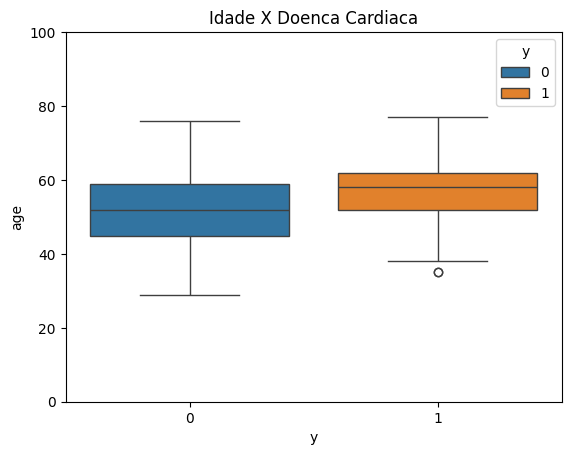

In [ ]:
sns.boxplot(x='y', y='age', hue='y', data=df)
plt.title('Idade X Doenca Cardiaca')
plt.ylim(0, 100)
plt.show()

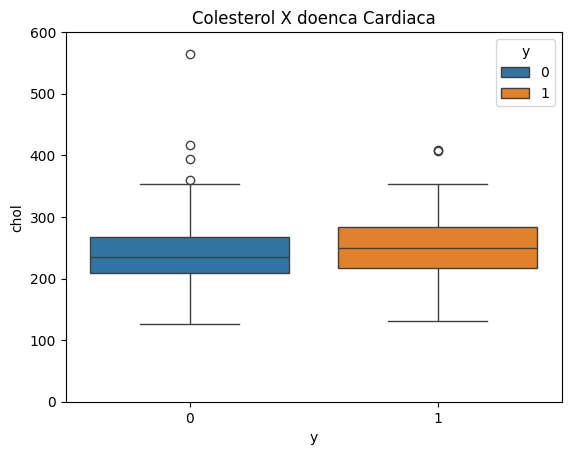

In [ ]:
sns.boxplot(x='y', y='chol', hue='y', data=df)
plt.title('Colesterol X doenca Cardiaca')
plt.ylim(0, 600)
plt.show()

In [ ]:
df[['age', 'chol', 'y']].corr()

,age,chol,y
age,1.00000,0.208950,0.223120
chol,0.20895,1.000000,0.085164
y,0.22312,0.085164,1.000000


In [ ]:
X['cp'].unique()

array([1, 4, 3, 2])

In [ ]:
import pandas as pd

In [ ]:
df_cp = pd.get_dummies(X['cp'], prefix='cp')
df_cp.head()

,cp_1,cp_2,cp_3,cp_4
0,1,0,0,0
1,0,0,0,1
2,0,0,0,1
3,0,0,1,0
4,0,1,0,0


In [ ]:
X = X.drop('cp', axis=1).join(df_cp)
X.head()

,age,chol,cp_1,cp_2,cp_3,cp_4
0,63,233,1,0,0,0
1,67,286,0,0,0,1
2,67,229,0,0,0,1
3,37,250,0,0,1,0
4,41,204,0,1,0,0
